In [13]:
# import modules
import sympy as sp 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams, cm
# enable dark mode
# plt.style.use('dark_background')

# global settings of plots DO NOT CHANGE
medium_fontsize = 27.5
font = {'size': medium_fontsize, 'family': 'sans-serif', 'weight': 'bold'}
rc('font', **font)
rcParams['axes.linewidth'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['lines.linewidth'] = 2.5

# global color definitions
violet = (95 / 255.0, 0.0, 100 / 255.0, 1.0)
blue = (50 / 255.0, 98 / 255.0, 150 / 255.0, 1.0)
green = (85 / 255.0, 173 / 255.0, 57 / 255.0, 1.0)
yellow = (250 / 255.0, 179 / 255.0, 0.0, 1.0)
red = (250 / 255.0, 0.0, 0.0, 1.0)
black = (0.0, 0.0, 0.0, 1.0)

In [14]:
def sp_to_linspace(sp, var, input):
    """
    converts a sympy expression to a numpy linspace
    """
    f = sp.lambdify(var, sp, modules='numpy')
    return input, f(input)

(E/2 + q)**2/(E**2/4 + 1)

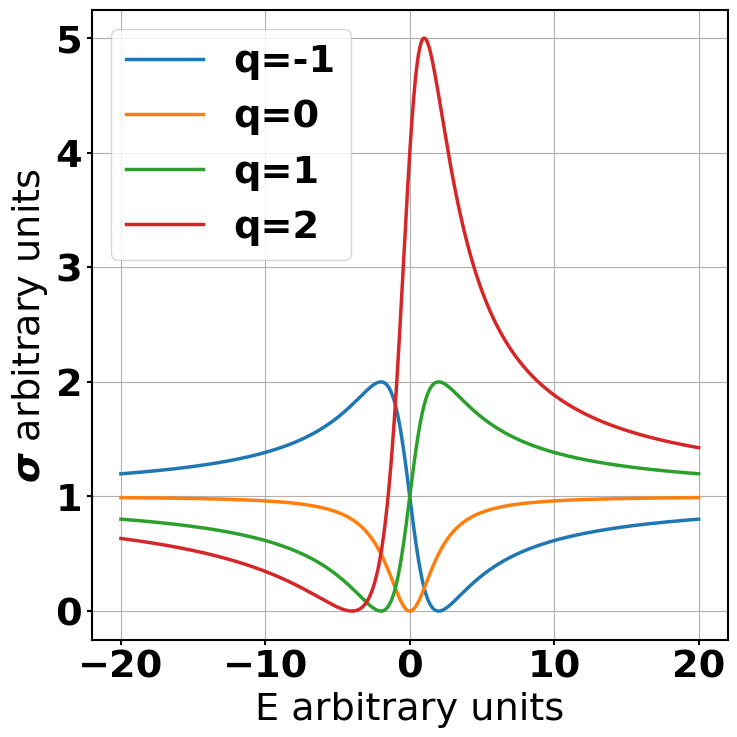

In [15]:
import matplotlib.pyplot as plt

sigma = sp.Symbol('\sigma')
epsilon = sp.Symbol('\epsilon')
E, E_0 = sp.symbols('E E_0')
q = sp.Symbol('q')
fwhm = sp.Symbol('\Gamma')

epsilon = (E - E_0)/fwhm

sigma = ((q + epsilon)**2)/(1 + epsilon**2)


sigma = sigma.subs({E_0: 0,  fwhm: 2})

display(sigma)
# plot sigma
sigma_one = sp.lambdify(E,sigma.subs({q: 1}))
sigma_minus_one = sp.lambdify(E,sigma.subs({q: -1}))
sigma_zero = sp.lambdify(E,sigma.subs({q: 0}))
sigma_two = sp.lambdify(E,sigma.subs({q: 2}))

x = np.linspace(-20, 20, 1000)
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x, sigma_minus_one(x), label='q=-1')
ax.plot(x, sigma_zero(x), label='q=0')
ax.plot(x, sigma_one(x), label='q=1')
ax.plot(x, sigma_two(x), label='q=2')
ax.grid()
ax.legend(loc='best')

plt.xlabel('E arbitrary units')
plt.ylabel('$\sigma$ arbitrary units')
plt.tight_layout()
plt.savefig('figures/q_compare.png')
plt.show()


